In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pulp
from sklearn.linear_model import LinearRegression

from scipy import stats

# Initialize seaborn (for plotting)
sns.set()

In [2]:
df_Centers = pd.read_csv("centers.csv", index_col=0)
df_Centers

,Opening Costs,Operating Costs,Num MPs,Maximum capacity
Center,,,,
Center A,0,275000,215,5000000
Center B,0,275000,125,5000000
Center C,0,275000,100,5000000
Center D,0,285000,120,5000000
Center E,250000,125000,0,5000000
Center F,100000,175000,0,5000000


In [3]:
df_Demands = pd.read_csv("demands.csv")
df_Demands.head()

,Year,Region,Demand
0,2013,Downtown Toronto,249581
1,2013,East York,172730
2,2013,Etobicoke,285764
3,2013,Mississauga East,255427
4,2013,North Toronto,263276


In [4]:
df_Distances = pd.read_csv("distances.csv")
df_Distances

,Center,Region,Distance
0,Center A,Downtown Toronto,25.77
1,Center A,East York,2.24
2,Center A,Etobicoke,25.72
3,Center A,Mississauga East,28.65
4,Center A,North Toronto,11.64
5,Center A,North York,0.00
6,Center A,Scarborough East,19.76
7,Center B,Downtown Toronto,29.88
8,Center B,East York,16.04
9,Center B,Etobicoke,31.11


## Demand Forecast

/var/folders/lc/b3fnl0s565b49nnwtc7k9r_40000gn/T/ipykernel_47920/2775294000.py:2: UserWarning: 
The markers list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x = 'Year', y = 'Demand', data = df_Demands, hue ='Region', style='Region',markers='o')


<Axes: xlabel='Year', ylabel='Demand'>

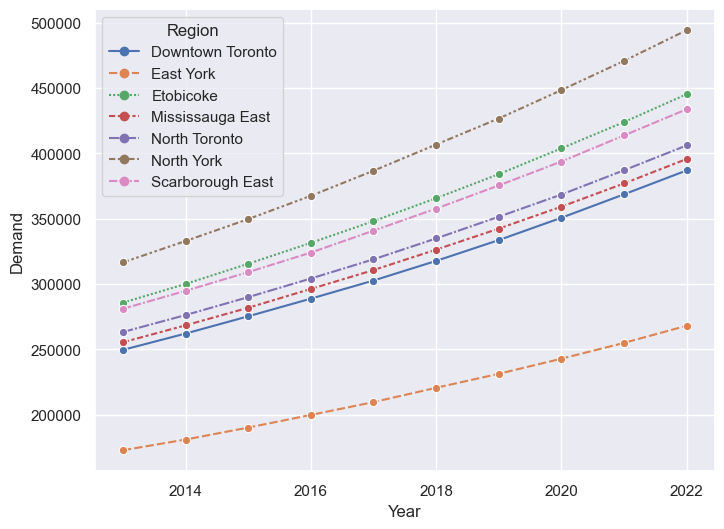

In [5]:
plt.figure(figsize = (8,6))
sns.lineplot(x = 'Year', y = 'Demand', data = df_Demands, hue ='Region', style='Region',markers='o')

In [6]:
Regions = df_Demands['Region'].unique()
new_years = np.array([2023,2024,2025])
new_X = pd.DataFrame({'X': list(new_years),'X^2':list(new_years**2)})
predictions = []
Region = []
Year = []
for region in Regions:
    df = df_Demands[df_Demands['Region'] == region]
    y = df['Demand'].reset_index(drop=True)
    X = df['Year']
    data = {'X': list(X),'X^2': list(X**2)}
    X = pd.DataFrame(data)
    model = LinearRegression()
    model.fit(X, y)
    prediction = model.predict(new_X)
    predictions = np.append(predictions, prediction)
    Region = np.append(Region, np.array([region]*3))
    Year = np.append(Year, np.array(new_years))

df_prediction = pd.DataFrame({'Year': Year, 'Region': Region, 'Pred_Demand': predictions})
df_prediction['Year'] = df_prediction['Year'].astype(int)
df_prediction

,Year,Region,Pred_Demand
0,2023,Downtown Toronto,406126.666667
1,2024,Downtown Toronto,426154.769697
2,2025,Downtown Toronto,446985.690909
3,2023,East York,281076.383333
4,2024,East York,294831.374242
5,2025,East York,309115.963636
6,2023,Etobicoke,467217.900000
7,2024,Etobicoke,490055.457576
8,2025,Etobicoke,513748.454545
9,2023,Mississauga East,414563.233333


/var/folders/lc/b3fnl0s565b49nnwtc7k9r_40000gn/T/ipykernel_47920/3856121216.py:2: UserWarning: 
The markers list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='Year', y='Pred_Demand', data = df_prediction, hue ='Region', style = 'Region', markers= 'o')


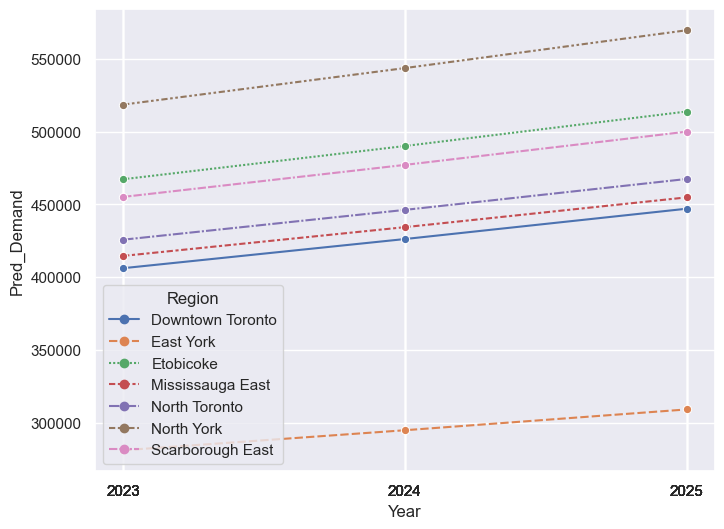

In [7]:
plt.figure(figsize = (8,6))
sns.lineplot(x='Year', y='Pred_Demand', data = df_prediction, hue ='Region', style = 'Region', markers= 'o')
plt.xticks(df_prediction['Year'].astype(int))
plt.show()


In [9]:
import statsmodels.api as sm
df = df_Demands[df_Demands['Region'] == 'Downtown Toronto']
y = df['Demand'].reset_index(drop=True)
X = df['Year']
data = {'X': list(X),
     'X^2': list(X**2)}
X = pd.DataFrame(data)
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())
model.predict(sm.add_constant(new_X))

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.135e+04
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           8.27e-16
Time:                        22:51:42   Log-Likelihood:                -71.448
No. Observations:                  10   AIC:                             148.9
Df Residuals:                       7   BIC:                             149.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.603e+09   6.49e+07     24.695      0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0    406126.666297
1    426154.769328
2    446985.690540
dtype: float64

In [10]:
df_prediction

,Year,Region,Pred_Demand
0,2023,Downtown Toronto,406126.666667
1,2024,Downtown Toronto,426154.769697
2,2025,Downtown Toronto,446985.690909
3,2023,East York,281076.383333
4,2024,East York,294831.374242
5,2025,East York,309115.963636
6,2023,Etobicoke,467217.900000
7,2024,Etobicoke,490055.457576
8,2025,Etobicoke,513748.454545
9,2023,Mississauga East,414563.233333


## Pre-Analysis

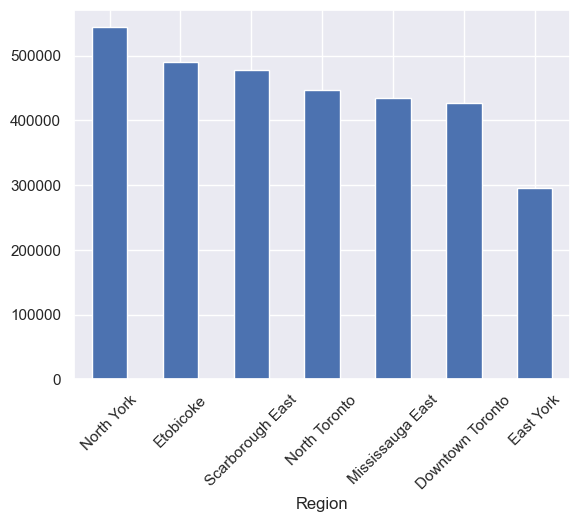

In [11]:
df_prediction.groupby("Region")['Pred_Demand'].mean().sort_values(ascending =False).plot(kind ='bar')
plt.xticks(rotation=45)
plt.show()


## Base Model (one year)

In [12]:
# Centers
centers = list(df_Centers.index)
num_centers = len(centers)
print(centers)
print("Total number of centers: " + str(num_centers))

# Regions
regions = list(df_Demands['Region'].unique())
num_regions = len(Regions)
print(Regions)
print("Total number of regions: " + str(num_regions))

['Center A', 'Center B', 'Center C', 'Center D', 'Center E', 'Center F']
Total number of centers: 6
['Downtown Toronto' 'East York' 'Etobicoke' 'Mississauga East'
 'North Toronto' 'North York' 'Scarborough East']
Total number of regions: 7


In [13]:
df_one_year = df_prediction[df_prediction['Year'] == 2023]
df_one_year = df_one_year.set_index('Region')
df_one_year

,Year,Pred_Demand
Region,,
Downtown Toronto,2023,406126.666667
East York,2023,281076.383333
Etobicoke,2023,467217.900000
Mississauga East,2023,414563.233333
North Toronto,2023,425696.200000
North York,2023,518489.633333
Scarborough East,2023,455084.466666


In [14]:
sum(df_one_year['Pred_Demand'])

2968254.48333323

In [15]:
df_Centers

,Opening Costs,Operating Costs,Num MPs,Maximum capacity
Center,,,,
Center A,0,275000,215,5000000
Center B,0,275000,125,5000000
Center C,0,275000,100,5000000
Center D,0,285000,120,5000000
Center E,250000,125000,0,5000000
Center F,100000,175000,0,5000000


In [16]:
df_Distances.head(5)

,Center,Region,Distance
0,Center A,Downtown Toronto,25.77
1,Center A,East York,2.24
2,Center A,Etobicoke,25.72
3,Center A,Mississauga East,28.65
4,Center A,North Toronto,11.64


### Parameters

In [17]:
# Demand in each region (dictionary) Di
region_demand = {}
for j in regions:
    region_demand[j] = float(df_one_year.loc[j]["Pred_Demand"])

# Operating cost for each center fi
operating_cost = {}
for i in centers:
    operating_cost[i] = float(df_Centers.loc[i]["Operating Costs"])

# Opening cost for each center Oi
opening_cost = {}
for i in centers:
    opening_cost[i] = float(df_Centers.loc[i]["Opening Costs"])

# Must open centers:
opened_centers = df_Centers.index[0:4]

not_open_centers = df_Centers.index[4:]

# Max working hour per day per MP
max_hour = 6

# 3 Max working day per year per MP
max_day = 250

# total number of workers from year 1:
total_worker_in_year1 = sum(df_Centers["Num MPs"])

# Center capacities (dictionary) Ki
center_capacity = {}
for i in centers:
    center_capacity[i] = df_Centers.loc[i]["Maximum capacity"]

# Hourly pay for a worker
hour_pay = 37.85

# travel expenses for a worker cost per km per hour
cost_per_km = 0.25

# government reimbursement
gov_reimb = 42

# max hiring:
max_hiring = 300

# hiring cost per MP
cost_hiring = 15000

# Cost for workers from center i to work in region j  Cij
cost_region_centers = {}
for i in centers:
    for j in regions:
        cost_region_centers[(i,j)] = hour_pay - gov_reimb + \
        cost_per_km * (df_Distances[(df_Distances["Center"] == i) & (df_Distances["Region"] == j)]["Distance"])


### Variables

In [18]:
# Variables: if a center is opened/allocated
yvar = pulp.LpVariable.dict("y", centers, cat=pulp.LpBinary)

# Variables: amount of demand from each region allocated to center
xvar = pulp.LpVariable.dict("x", (centers, regions), lowBound=0.0, cat=pulp.LpContinuous)

# Variables: number of workers allocated to center i
wvar = pulp.LpVariable.dict("w", centers, lowBound= 0, cat = pulp.LpInteger)

# Variables: number of workers to hire for center i
hvar = pulp.LpVariable.dict("h", centers, lowBound= 0, upBound= max_hiring, cat= pulp.LpInteger)

### Model initialization

In [19]:
# Initialize model and objective sense
one_year_model = pulp.LpProblem(name="One_Year_Model", sense=pulp.LpMinimize)

### Constraints

In [20]:
# Constraint: demand must be satisfied 
for j in regions:
    one_year_model += pulp.lpSum( [xvar[(i,j)] for i in centers] ) == region_demand[j]

# Constraint: center max capacities must be observed in all scenarios
for i in centers:        
    one_year_model += pulp.lpSum( [xvar[(i,j)] for j in regions] ) <= center_capacity[i] * yvar[i]

# Constraint: centers A ~ D must be open
# one_year_model += pulp.lpSum( [yvar[i] for i in opened_centers]) == 4

# Constraint: total number of workers = 560
one_year_model += pulp.lpSum( [wvar[i] for i in centers]) == total_worker_in_year1


# Constraint: total demand served must be smaller than total working hour 
for i in centers: 
    one_year_model += pulp.lpSum([xvar[(i,j)] for j in regions]) <= max_hour * max_day * (wvar[i] + hvar[i])


### Objective Function

In [21]:
# Objective Function

# Total Operating + Opening Costs
obj = pulp.lpSum([ (operating_cost[i]+opening_cost[i]) * yvar[i] for i in centers])

# Total cost for service
obj += pulp.lpSum([ cost_region_centers[(i,j)] * xvar[(i,j)] for i in centers for j in regions ] )

# Total hiring costs
obj += pulp.lpSum( [hvar[i] for i in centers]) * cost_hiring

one_year_model += obj

## Solution proces 

In [22]:
one_year_model.writeLP("One_Year_Model.lp")

one_year_model.solve()
print("Status:", pulp.LpStatus[one_year_model.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/lc/b3fnl0s565b49nnwtc7k9r_40000gn/T/486d94ee236446a59cfe10884c1bd8bc-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/lc/b3fnl0s565b49nnwtc7k9r_40000gn/T/486d94ee236446a59cfe10884c1bd8bc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 25 COLUMNS
At line 266 RHS
At line 287 BOUNDS
At line 306 ENDATA
Problem MODEL has 20 rows, 60 columns and 150 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.28828e+07 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 6 strengthened rows, 0 substitutions
Cgl0004I processed model has 20 rows, 60 columns (18 integer (6 of which binary)) and 150 elements
Cbc0038I Initial state - 9 integers unsatisfied sum - 2.0

In [23]:
# Total cost
totalCost = pulp.value(one_year_model.objective)
print("Total cost: " + str(totalCost))

Total cost: 14189190.783591624


In [24]:
# Print solution (you can add to the dataframe if needed)
for i in centers:
    if yvar[i].varValue >= 1.0:
        print("Center " + str(i) + " is opearting")        
        print("\tAllocated Worker = " +str(wvar[i].varValue))
        print("\tNew hires = " +str(hvar[i].varValue))              
        for j in regions:
            if xvar[(i,j)].varValue > 0.0:
                print("\t\tServes region " + str(j) + " - with capacity " + str(xvar[(i,j)].varValue))
    else:
        print("Center " + str(i) + " is not operating") 

Center Center A is opearting
	Allocated Worker = 233.0
	New hires = 300.0
		Serves region East York - with capacity 281010.37
		Serves region North York - with capacity 518489.63
Center Center B is opearting
	Allocated Worker = 4.0
	New hires = 300.0
		Serves region East York - with capacity 66.016667
		Serves region Etobicoke - with capacity 604.0
		Serves region Scarborough East - with capacity 455084.47
Center Center C is not operating
Center Center D is opearting
	Allocated Worker = 0.0
	New hires = 219.0
		Serves region Mississauga East - with capacity 328500.0
Center Center E is opearting
	Allocated Worker = 323.0
	New hires = 300.0
		Serves region Downtown Toronto - with capacity 406126.67
		Serves region Etobicoke - with capacity 102677.13
		Serves region North Toronto - with capacity 425696.2
Center Center F is opearting
	Allocated Worker = 0.0
	New hires = 300.0
		Serves region Etobicoke - with capacity 363936.77
		Serves region Mississauga East - with capacity 86063.233


In [25]:
df_one_year

,Year,Pred_Demand
Region,,
Downtown Toronto,2023,406126.666667
East York,2023,281076.383333
Etobicoke,2023,467217.900000
Mississauga East,2023,414563.233333
North Toronto,2023,425696.200000
North York,2023,518489.633333
Scarborough East,2023,455084.466666


## Final Model - Accept All Patients

In [26]:
# Centers
centers = list(df_Centers.index)
num_centers = len(centers)
print(centers)
print("Total number of centers: " + str(num_centers))

# Regions
regions = list(df_Demands['Region'].unique())
num_regions = len(Regions)
print(regions)
print("Total number of regions: " + str(num_regions))

# Periods
years = list(df_prediction['Year'].unique())
num_years = len(years)
print(years)
print("Total number of years: " + str(num_years))

['Center A', 'Center B', 'Center C', 'Center D', 'Center E', 'Center F']
Total number of centers: 6
['Downtown Toronto', 'East York', 'Etobicoke', 'Mississauga East', 'North Toronto', 'North York', 'Scarborough East']
Total number of regions: 7
[2023, 2024, 2025]
Total number of years: 3


### Constants

In [27]:
# Hourly pay for a worker
hour_pay = 37.85

# pay growth rate
growth_rate = 0.025

# travel expenses for a worker cost per km per hour
cost_per_km = 0.25

# government reimbursement
gov_reimb = 42

# max hiring:
max_hiring = 300

# hiring cost per MP
cost_hiring = 15000

# Must open centers:
opened_centers = df_Centers.index[0:4]

# Optional opening centers:
not_open_centers = df_Centers.index[4:]

# Max working hour per day per MP
max_hour = 6

# 3 Max working day per year per MP
max_day = 250

# total number of workers from year 1:
total_worker_in_year1 = sum(df_Centers["Num MPs"])

### Parameters

In [28]:
df_prediction[(df_prediction['Region'] == regions[0]) & (df_prediction['Year'] == years[0])]['Pred_Demand']

0    406126.666667
Name: Pred_Demand, dtype: float64

In [29]:
# Demand in region i at time t (dictionary) Dit
region_demand = {}
for j in regions:
    for t in years:
        region_demand[(j,t)] = float(df_prediction[(df_prediction['Region'] == j) & 
                                                   (df_prediction['Year'] == t)]['Pred_Demand'])

# Operating cost for each center fi
operating_cost = {}
for i in centers:
    operating_cost[i] = float(df_Centers.loc[i]["Operating Costs"])

# Opening cost for each center Oi
opening_cost = {}
for i in centers:
    opening_cost[i] = float(df_Centers.loc[i]["Opening Costs"])

# Center capacities (dictionary) Ki
center_capacity = {}
for i in centers:
    center_capacity[i] = df_Centers.loc[i]["Maximum capacity"]

# Cost for workers from center i to work in region j at time t   Cijt
cost_region_centers = {}
for t in years: 
    for i in centers:
        for j in regions:
            cost_region_centers[(i,j,t)] = hour_pay*((1 + growth_rate)**(t-years[0])) - gov_reimb + \
            cost_per_km * (df_Distances[(df_Distances["Center"] == i) & (df_Distances["Region"] == j)]["Distance"])

### Variables

In [30]:
# Variables: if a center is opened/allocated
yvar = pulp.LpVariable.dict("y", (centers, years), cat=pulp.LpBinary)

# Variables: amount of demand from each region allocated to center
xvar = pulp.LpVariable.dict("x", (centers, regions, years), lowBound=0.0, cat=pulp.LpContinuous)

# Variables: number of workers allocated to center i
wvar = pulp.LpVariable.dict("w", (centers, years), lowBound= 0, cat = pulp.LpInteger)

# Variables: number of workers to hire for center i
hvar = pulp.LpVariable.dict("h", (centers, years), lowBound= 0, upBound= max_hiring, cat= pulp.LpInteger)

### Model initialization

In [31]:
# Initialize model and objective sense
final_model = pulp.LpProblem(name="Final_Model", sense=pulp.LpMinimize)

### Constraints

In [32]:
# Constraint: demand must be satisfied for every region and all 3 years
for t in years:
    for j in regions:
        final_model += pulp.lpSum( [xvar[(i,j,t)] for i in centers] ) == region_demand[(j,t)]

# Constraint: center max capacities must be observed in all scenarios
for t in years:
    for i in centers:        
        final_model += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= center_capacity[i] * yvar[(i,t)]

# Constraint: centers A ~ D must be open
# for t in years:
    # final_model += pulp.lpSum( [yvar[(i, t)] for i in opened_centers]) == 4

# Constraint: opened centers must stay open
# for t in years[1:]:
#    for i in centers:
#         final_model += yvar[(i, t)] == yvar[(i, t-1)] 

# Constraint: total number of workers = 560 for first year
final_model += pulp.lpSum( [wvar[(i,years[0])] for i in centers]) == total_worker_in_year1

# Constraint: total demand served must be smaller than total working hour 
for t in years:
    for i in centers: 
        final_model += pulp.lpSum([xvar[(i,j,t)] for j in regions]) <= max_hour * max_day * (wvar[(i,t)] + hvar[(i,t)])

# Constriant: total number of workers at t for center i should be the total number of workers at t-1 + hired at t-1
for t in years[1:]:
    for i in centers:
        final_model += wvar[(i,t-1)] + hvar[(i,t-1)] == wvar[(i,t)]

### Objective Function

In [33]:
# Objective Function

# Total Operating over the years
obj = pulp.lpSum([ operating_cost[i] * yvar[(i,t)] for t in years for i in centers])

# Total Opening Costs for the first year
obj += pulp.lpSum([ opening_cost[i] * yvar[(i,years[0])] for i in centers])

# Total cost for service
obj += pulp.lpSum([ cost_region_centers[(i,j,t)] * xvar[(i,j,t)] for i in centers for j in regions for t in years] )

# Total hiring costs
obj += pulp.lpSum( [hvar[(i,t)] for i in centers for t in years]) * cost_hiring

final_model += obj

In [36]:
from pulp import PULP_CBC_CMD

In [37]:
final_model.writeLP("Final_Model.lp")
final_model.solve(PULP_CBC_CMD(msg=1, maxSeconds= 60*3))
print("Status:", pulp.LpStatus[final_model.status])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/lc/b3fnl0s565b49nnwtc7k9r_40000gn/T/4f726699df3e4ed2a55a2ac13aa2eb7b-pulp.mps sec 180 timeMode elapsed branch printingOptions all solution /var/folders/lc/b3fnl0s565b49nnwtc7k9r_40000gn/T/4f726699df3e4ed2a55a2ac13aa2eb7b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 75 COLUMNS
At line 820 RHS
At line 891 BOUNDS
At line 946 ENDATA
Problem MODEL has 70 rows, 180 columns and 474 elements
Coin0008I MODEL read with 0 errors
seconds was changed from 1e+100 to 180
Option for timeMode changed from cpu to elapsed
Continuous objective value is 6.73162e+06 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 18 strengthened rows, 0 substitutions
Cgl0004I processed model has 64 rows, 174 columns (48 integer (18 of which binary)) and 468 elements
Cbc003

In [38]:
# Total cost
totalCost = pulp.value(final_model.objective)
print("Total cost: " + str(totalCost))

Total cost: 10048839.365279868


In [39]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
total_operating = sum([operating_cost[i] * -yvar[(i,t)].varValue for t in years for i in centers])
total_opening = sum([ opening_cost[i] * - yvar[(i,years[0])].varValue for i in centers])
total_service_cost = sum([-((cost_region_centers[(i,j,t)].values)[0] + 42) * xvar[(i,j,t)].varValue for i in centers for j in regions for t in years])
total_hiring_cost = sum([hvar[(i,t)].varValue for i in centers for t in years]) * - cost_hiring
total_service_revenue = sum( [xvar[(i,j,t)].varValue * 42 for i in centers for j in regions for t in years])
result_summary = pd.DataFrame({"total_oerating_cost": total_operating, "total_opening" :total_opening,"total_service_cost": total_service_cost,
                               "total_hiring_cost": total_hiring_cost,
                               "total_service_revenue" : total_service_revenue, "total_Profit_/_Cost":-totalCost},index=[0])
result_summary = result_summary.T.rename(columns = {0:"In dollar $"})
result_summary = result_summary.round(2)
result_summary

,In dollar $
total_oerating_cost,-3405000.00
total_opening,-350000.00
total_service_cost,-374430446.00
total_hiring_cost,-24225000.00
total_service_revenue,392361606.63
total_Profit_/_Cost,-10048839.37


In [40]:
# Print solution (you can add to the dataframe if needed)
for t in years:
    print("Year =" + str(t))
    for i in centers:
        if yvar[(i,t)].varValue >= 1.0:
            print("\tCenter " + str(i) + " is opened")        
            print("\t\tAllocated Worker = " +str(wvar[(i,t)].varValue))
            print("\t\tNew hires = " +str(hvar[(i,t)].varValue))    
            for j in regions:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\t\t\tServes region " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))
        else:
            print("\tCenter " + str(i) + " is not opened") 
        


Year =2023
	Center Center A is opened
		Allocated Worker = 233.0
		New hires = 300.0
			Serves region East York - with capacity 281010.37
			Serves region North York - with capacity 518489.63
	Center Center B is opened
		Allocated Worker = 4.0
		New hires = 300.0
			Serves region East York - with capacity 66.016667
			Serves region Etobicoke - with capacity 604.0
			Serves region Scarborough East - with capacity 455084.47
	Center Center C is not opened
	Center Center D is opened
		Allocated Worker = 0.0
		New hires = 220.0
			Serves region Mississauga East - with capacity 330000.0
	Center Center E is opened
		Allocated Worker = 323.0
		New hires = 300.0
			Serves region Downtown Toronto - with capacity 406126.67
			Serves region Etobicoke - with capacity 102677.13
			Serves region North Toronto - with capacity 425696.2
	Center Center F is opened
		Allocated Worker = 0.0
		New hires = 299.0
			Serves region Etobicoke - with capacity 363936.77
			Serves region Mississauga East - with cap

In [41]:
# Print solution (you can add to the dataframe if needed)
Year = []
num_HPs = []
num_new_hire = []
Center = []
Open_Y = []

East_York = []
Etobicoke = []
Mississauga_East = []
North_Toronto= []
North_York = []
Scarborough_East = []
Downtown_Toronto = []


for t in years:
    for i in centers:
        Year = np.append(Year, t)
        num_HPs = np.append(num_HPs, wvar[(i,t)].varValue)     
        num_new_hire = np.append(num_new_hire, hvar[(i,t)].varValue)    
        Center =  np.append(Center, i)
        Open_Y = np.append(Open_Y, yvar[(i,t)].varValue)
        for j in regions:
            if j == 'East York':
                East_York = np.append(East_York, xvar[(i,j,t)].varValue)
            elif j == 'Etobicoke':
                Etobicoke = np.append(Etobicoke, xvar[(i,j,t)].varValue)
            elif j == 'Mississauga East':
                Mississauga_East = np.append(Mississauga_East, xvar[(i,j,t)].varValue)
            elif j == 'North Toronto':
                North_Toronto = np.append(North_Toronto, xvar[(i,j,t)].varValue)
            elif j == 'North York':
                North_York = np.append(North_York, xvar[(i,j,t)].varValue)
            elif j == 'Scarborough East':
                Scarborough_East = np.append(Scarborough_East, xvar[(i,j,t)].varValue)
            elif j == 'Downtown Toronto':
                Downtown_Toronto = np.append(Downtown_Toronto, xvar[(i,j,t)].varValue)
        


In [42]:
result_table = pd.DataFrame({"Center": Center, "Open_Y": Open_Y, "Year": Year, "num_HPs": num_HPs, "num_new_hire": num_new_hire, "East_York": East_York,
                              "Etobicoke": Etobicoke, "Mississauga_East":Mississauga_East, "North_Toronto": North_Toronto,
                              "North_York":North_York, "Scarborough_East":Scarborough_East,"Downtown_Toronto":Downtown_Toronto})
result_table["Year"] = result_table["Year"].astype(int)
result_table["num_HPs"] = result_table["num_HPs"].astype(int)
result_table["num_new_hire"] = result_table["num_new_hire"].astype(int)
result_table = result_table.round(decimals = 2)
result_table

,Center,Open_Y,Year,num_HPs,num_new_hire,East_York,Etobicoke,Mississauga_East,North_Toronto,North_York,Scarborough_East,Downtown_Toronto
0,Center A,1.00,2023,233,300,281010.37,0.00,0.00,0.00,518489.63,0.00,0.00
1,Center B,1.00,2023,4,300,66.02,604.00,0.00,0.00,0.00,455084.47,0.00
2,Center C,0.00,2023,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Center D,1.00,2023,0,220,0.00,0.00,330000.00,0.00,0.00,0.00,0.00
4,Center E,1.00,2023,323,300,0.00,102677.13,0.00,425696.20,0.00,0.00,406126.67
5,Center F,1.00,2023,0,299,0.00,363936.77,84563.23,0.00,0.00,0.00,0.00
6,Center A,1.00,2024,533,26,294831.37,0.00,0.00,0.00,543578.19,0.00,0.00
7,Center B,1.00,2024,304,29,0.00,0.00,0.00,0.00,0.00,477078.87,0.00
8,Center C,0.00,2024,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Center D,1.00,2024,220,0,0.00,0.00,242696.48,0.00,0.00,0.00,0.00


## Final Model - Free to accept or reject any patients

In [43]:
# Initialize model and objective sense
final_model = pulp.LpProblem(name="Final_Model", sense=pulp.LpMinimize)

### Constraints

In [44]:
# Constraint: demand must be satisfied for every region and all 3 years
for t in years:
    for j in regions:
        final_model += pulp.lpSum( [xvar[(i,j,t)] for i in centers] ) <= region_demand[(j,t)]

# Constraint: center max capacities must be observed in all scenarios
for t in years:
    for i in centers:        
        final_model += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= center_capacity[i] * yvar[(i,t)]

# Constraint: centers A ~ D must be open
# for t in years:
    # final_model += pulp.lpSum( [yvar[(i, t)] for i in opened_centers]) == 4

# Constraint: opened centers must stay open
# for t in years[1:]:
#    for i in centers:
#         final_model += yvar[(i, t)] == yvar[(i, t-1)] 

# Constraint: total number of workers = 560 for first year
final_model += pulp.lpSum( [wvar[(i,years[0])] for i in centers]) == total_worker_in_year1

# Constraint: total demand served must be smaller than total working hour 
for t in years:
    for i in centers: 
        final_model += pulp.lpSum([xvar[(i,j,t)] for j in regions]) <= max_hour * max_day * (wvar[(i,t)] + hvar[(i,t)])

# Constriant: total number of workers at t for center i should be the total number of workers at t-1 + hired at t-1
for t in years[1:]:
    for i in centers:
        final_model += wvar[(i,t-1)] + hvar[(i,t-1)] == wvar[(i,t)]

### Objective Function

In [45]:
# Objective Function

# Total Operating over the years
obj = pulp.lpSum([ operating_cost[i] * yvar[(i,t)] for t in years for i in centers])

# Total Opening Costs for the first year
obj += pulp.lpSum([ opening_cost[i] * yvar[(i,years[0])] for i in centers])

# Total cost for service
obj += pulp.lpSum([ cost_region_centers[(i,j,t)] * xvar[(i,j,t)] for i in centers for j in regions for t in years] )

# Total hiring costs
obj += pulp.lpSum( [hvar[(i,t)] for i in centers for t in years]) * cost_hiring

final_model += obj

In [46]:
from pulp import PULP_CBC_CMD

In [47]:
final_model.writeLP("Final_Model.lp")
final_model.solve(PULP_CBC_CMD(msg=1, maxSeconds= 60*3))
print("Status:", pulp.LpStatus[final_model.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/lc/b3fnl0s565b49nnwtc7k9r_40000gn/T/5a53f08de25c4c1dbc72a4727e12cc3b-pulp.mps sec 180 timeMode elapsed branch printingOptions all solution /var/folders/lc/b3fnl0s565b49nnwtc7k9r_40000gn/T/5a53f08de25c4c1dbc72a4727e12cc3b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 75 COLUMNS
At line 820 RHS
At line 891 BOUNDS
At line 946 ENDATA
Problem MODEL has 70 rows, 180 columns and 474 elements
Coin0008I MODEL read with 0 errors
seconds was changed from 1e+100 to 180
Option for timeMode changed from cpu to elapsed
Continuous objective value is -7.94858e+06 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 12 strengthened rows, 0 substitutions
Cgl0004I processed model has 47 rows, 71 columns (43 integer (16 of which binary)) and 154 elements
Cbc003

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


In [48]:
# Total cost
totalCost = pulp.value(final_model.objective)
print("Total cost: " + str(totalCost))

Total cost: -6803094.948499997


In [49]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
total_operating = sum([operating_cost[i] * -yvar[(i,t)].varValue for t in years for i in centers])
total_opening = sum([ opening_cost[i] * - yvar[(i,years[0])].varValue for i in centers])
total_service_cost = sum([-((cost_region_centers[(i,j,t)].values)[0] + 42) * xvar[(i,j,t)].varValue for i in centers for j in regions for t in years])
total_hiring_cost = sum([hvar[(i,t)].varValue for i in centers for t in years]) * - cost_hiring
total_service_revenue = sum( [xvar[(i,j,t)].varValue * 42 for i in centers for j in regions for t in years])
result_summary = pd.DataFrame({"total_oerating_cost": total_operating, "total_opening" :total_opening,"total_service_cost": total_service_cost,
                               "total_hiring_cost": total_hiring_cost,
                               "total_service_revenue" : total_service_revenue, "total_Profit_/_Cost":-totalCost},index=[0])
result_summary = result_summary.T.rename(columns = {0:"In dollar $"})
result_summary = result_summary.round(2)
result_summary

,In dollar $
total_oerating_cost,-900000.00
total_opening,-350000.00
total_service_cost,-97786905.05
total_hiring_cost,-0.00
total_service_revenue,105840000.00
total_Profit_/_Cost,6803094.95


In [50]:
# Print solution (you can add to the dataframe if needed)
for t in years:
    print("Year =" + str(t))
    for i in centers:
        if yvar[(i,t)].varValue >= 1.0:
            print("\tCenter " + str(i) + " is opened")        
            print("\t\tAllocated Worker = " +str(wvar[(i,t)].varValue))
            print("\t\tNew hires = " +str(hvar[(i,t)].varValue))    
            for j in regions:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\t\t\tServes region " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))
        else:
            print("\tCenter " + str(i) + " is not opened") 
        


Year =2023
	Center Center A is not opened
	Center Center B is not opened
	Center Center C is not opened
	Center Center D is not opened
	Center Center E is opened
		Allocated Worker = 284.0
		New hires = 0.0
			Serves region Downtown Toronto - with capacity 303.8
			Serves region North Toronto - with capacity 425696.2
	Center Center F is opened
		Allocated Worker = 276.0
		New hires = 0.0
			Serves region Mississauga East - with capacity 414000.0
Year =2024
	Center Center A is not opened
	Center Center B is not opened
	Center Center C is not opened
	Center Center D is not opened
	Center Center E is opened
		Allocated Worker = 284.0
		New hires = 0.0
			Serves region North Toronto - with capacity 426000.0
	Center Center F is opened
		Allocated Worker = 276.0
		New hires = 0.0
			Serves region Mississauga East - with capacity 414000.0
Year =2025
	Center Center A is not opened
	Center Center B is not opened
	Center Center C is not opened
	Center Center D is not opened
	Center Center E is o

In [51]:
# Print solution (you can add to the dataframe if needed)
Year = []
num_HPs = []
num_new_hire = []
Center = []
Open_Y = []

East_York = []
Etobicoke = []
Mississauga_East = []
North_Toronto= []
North_York = []
Scarborough_East = []
Downtown_Toronto = []


for t in years:
    for i in centers:
        Year = np.append(Year, t)
        num_HPs = np.append(num_HPs, wvar[(i,t)].varValue)     
        num_new_hire = np.append(num_new_hire, hvar[(i,t)].varValue)    
        Center =  np.append(Center, i)
        Open_Y = np.append(Open_Y, yvar[(i,t)].varValue)
        for j in regions:
            if j == 'East York':
                East_York = np.append(East_York, xvar[(i,j,t)].varValue)
            elif j == 'Etobicoke':
                Etobicoke = np.append(Etobicoke, xvar[(i,j,t)].varValue)
            elif j == 'Mississauga East':
                Mississauga_East = np.append(Mississauga_East, xvar[(i,j,t)].varValue)
            elif j == 'North Toronto':
                North_Toronto = np.append(North_Toronto, xvar[(i,j,t)].varValue)
            elif j == 'North York':
                North_York = np.append(North_York, xvar[(i,j,t)].varValue)
            elif j == 'Scarborough East':
                Scarborough_East = np.append(Scarborough_East, xvar[(i,j,t)].varValue)
            elif j == 'Downtown Toronto':
                Downtown_Toronto = np.append(Downtown_Toronto, xvar[(i,j,t)].varValue)
        


In [52]:
result_table = pd.DataFrame({"Center": Center, "Open_Y": Open_Y, "Year": Year, "num_HPs": num_HPs, "num_new_hire": num_new_hire, "East_York": East_York,
                              "Etobicoke": Etobicoke, "Mississauga_East":Mississauga_East, "North_Toronto": North_Toronto,
                              "North_York":North_York, "Scarborough_East":Scarborough_East,"Downtown_Toronto":Downtown_Toronto})
result_table["Year"] = result_table["Year"].astype(int)
result_table["num_HPs"] = result_table["num_HPs"].astype(int)
result_table["num_new_hire"] = result_table["num_new_hire"].astype(int)
result_table = result_table.round(decimals = 2)
result_table

,Center,Open_Y,Year,num_HPs,num_new_hire,East_York,Etobicoke,Mississauga_East,North_Toronto,North_York,Scarborough_East,Downtown_Toronto
0,Center A,0.00,2023,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Center B,0.00,2023,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Center C,0.00,2023,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Center D,0.00,2023,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Center E,1.00,2023,284,0,0.00,0.00,0.00,425696.20,0.00,0.00,303.80
5,Center F,1.00,2023,276,0,0.00,0.00,414000.00,0.00,0.00,0.00,0.00
6,Center A,0.00,2024,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Center B,0.00,2024,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Center C,0.00,2024,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Center D,0.00,2024,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Final Model - Fulfill at least 44% of demand for each region

In [53]:
# Initialize model and objective sense
final_model = pulp.LpProblem(name="Final_Model", sense=pulp.LpMinimize)

### Constraints

In [54]:
# Constraint: demand must be satisfied for every region and all 3 years
for t in years:
    for j in regions:
        final_model += pulp.lpSum( [xvar[(i,j,t)] for i in centers] ) >= 0.443 * region_demand[(j,t)]

# Constraint: demand must be satisfied for every region and all 3 years
for t in years:
    for j in regions:
        final_model += pulp.lpSum( [xvar[(i,j,t)] for i in centers] ) <= region_demand[(j,t)]

# Constraint: center max capacities must be observed in all scenarios
for t in years:
    for i in centers:        
        final_model += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= center_capacity[i] * yvar[(i,t)]

# Constraint: centers A ~ D must be open
# for t in years:
    # final_model += pulp.lpSum( [yvar[(i, t)] for i in opened_centers]) == 4

# Constraint: opened centers must stay open
# for t in years[1:]:
#    for i in centers:
#         final_model += yvar[(i, t)] == yvar[(i, t-1)] 

# Constraint: total number of workers = 560 for first year
final_model += pulp.lpSum( [wvar[(i,years[0])] for i in centers]) == total_worker_in_year1

# Constraint: total demand served must be smaller than total working hour 
for t in years:
    for i in centers: 
        final_model += pulp.lpSum([xvar[(i,j,t)] for j in regions]) <= max_hour * max_day * (wvar[(i,t)] + hvar[(i,t)])

# Constriant: total number of workers at t for center i should be the total number of workers at t-1 + hired at t-1
for t in years[1:]:
    for i in centers:
        final_model += wvar[(i,t-1)] + hvar[(i,t-1)] == wvar[(i,t)]

### Objective Function

In [55]:
# Objective Function

# Total Operating over the years
obj = pulp.lpSum([ operating_cost[i] * yvar[(i,t)] for t in years for i in centers])

# Total Opening Costs for the first year
obj += pulp.lpSum([ opening_cost[i] * yvar[(i,years[0])] for i in centers])

# Total cost for service
obj += pulp.lpSum([ cost_region_centers[(i,j,t)] * xvar[(i,j,t)] for i in centers for j in regions for t in years] )

# Total hiring costs
obj += pulp.lpSum( [hvar[(i,t)] for i in centers for t in years]) * cost_hiring

final_model += obj

In [56]:
from pulp import PULP_CBC_CMD

In [57]:
final_model.writeLP("Final_Model.lp")
final_model.solve(PULP_CBC_CMD(msg=1, maxSeconds= 60*3))
print("Status:", pulp.LpStatus[final_model.status])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/apis/coin_api.py:95: UserWarning: Parameter maxSeconds is being depreciated for timeLimit
  warnings.warn("Parameter maxSeconds is being depreciated for timeLimit")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/lc/b3fnl0s565b49nnwtc7k9r_40000gn/T/e9ca3046c77e4506a1f16cbe457c135c-pulp.mps sec 180 timeMode elapsed branch printingOptions all solution /var/folders/lc/b3fnl0s565b49nnwtc7k9r_40000gn/T/e9ca3046c77e4506a1f16cbe457c135c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 96 COLUMNS
At line 967 RHS
At line 1059 BOUNDS
At line 1114 ENDATA
Problem MODEL has 91 rows, 180 columns and 600 elements
Coin0008I MODEL read with 0 errors
seconds was changed from 1e+100 to 180
Option for timeMode changed from cpu to elapsed
Continuous objective value is -2.69741e+06 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 18 strengthened rows, 0 substitutions
Cgl0004I processed model has 64 rows, 174 columns (48 integer (18 of which binary)) and 468 elements
Cbc

In [58]:
# Total cost
totalCost = pulp.value(final_model.objective)
print("Total cost: " + str(totalCost))

Total cost: -1347.6184999952093


In [59]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
total_operating = sum([operating_cost[i] * -yvar[(i,t)].varValue for t in years for i in centers])
total_opening = sum([ opening_cost[i] * - yvar[(i,years[0])].varValue for i in centers])
total_service_cost = sum([-((cost_region_centers[(i,j,t)].values)[0] + 42) * xvar[(i,j,t)].varValue for i in centers for j in regions for t in years])
total_hiring_cost = sum([hvar[(i,t)].varValue for i in centers for t in years]) * - cost_hiring
total_service_revenue = sum( [xvar[(i,j,t)].varValue * 42 for i in centers for j in regions for t in years])
result_summary = pd.DataFrame({"total_oerating_cost": total_operating, "total_opening" :total_opening,"total_service_cost": total_service_cost,
                               "total_hiring_cost": total_hiring_cost,
                               "total_service_revenue" : total_service_revenue, "total_Profit_/_Cost":-totalCost},index=[0])
result_summary = result_summary.T.rename(columns = {0:"In dollar $"})
result_summary = result_summary.round(2)
result_summary

,In dollar $
total_oerating_cost,-2550000.00
total_opening,-350000.00
total_service_cost,-173408652.38
total_hiring_cost,-6075000.00
total_service_revenue,182385000.00
total_Profit_/_Cost,1347.62


In [60]:
# Print solution (you can add to the dataframe if needed)
for t in years:
    print("Year =" + str(t))
    for i in centers:
        if yvar[(i,t)].varValue >= 1.0:
            print("\tCenter " + str(i) + " is opened")        
            print("\t\tAllocated Worker = " +str(wvar[(i,t)].varValue))
            print("\t\tNew hires = " +str(hvar[(i,t)].varValue))    
            for j in regions:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\t\t\tServes region " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))
        else:
            print("\tCenter " + str(i) + " is not opened") 
        


Year =2023
	Center Center A is opened
		Allocated Worker = 4.0
		New hires = 256.0
			Serves region East York - with capacity 124516.84
			Serves region North York - with capacity 265483.16
	Center Center B is opened
		Allocated Worker = 0.0
		New hires = 148.0
			Serves region Scarborough East - with capacity 222000.0
	Center Center C is not opened
	Center Center D is not opened
	Center Center E is opened
		Allocated Worker = 421.0
		New hires = 1.0
			Serves region Downtown Toronto - with capacity 179914.11
			Serves region Etobicoke - with capacity 206977.53
			Serves region North Toronto - with capacity 246108.36
	Center Center F is opened
		Allocated Worker = 135.0
		New hires = 0.0
			Serves region Mississauga East - with capacity 202500.0
Year =2024
	Center Center A is opened
		Allocated Worker = 260.0
		New hires = 0.0
			Serves region East York - with capacity 130610.3
			Serves region North York - with capacity 259389.7
	Center Center B is opened
		Allocated Worker = 148.0
		

In [61]:
# Print solution (you can add to the dataframe if needed)
Year = []
num_HPs = []
num_new_hire = []
Center = []
Open_Y = []

East_York = []
Etobicoke = []
Mississauga_East = []
North_Toronto= []
North_York = []
Scarborough_East = []
Downtown_Toronto = []


for t in years:
    for i in centers:
        Year = np.append(Year, t)
        num_HPs = np.append(num_HPs, wvar[(i,t)].varValue)     
        num_new_hire = np.append(num_new_hire, hvar[(i,t)].varValue)    
        Center =  np.append(Center, i)
        Open_Y = np.append(Open_Y, yvar[(i,t)].varValue)
        for j in regions:
            if j == 'East York':
                East_York = np.append(East_York, xvar[(i,j,t)].varValue)
            elif j == 'Etobicoke':
                Etobicoke = np.append(Etobicoke, xvar[(i,j,t)].varValue)
            elif j == 'Mississauga East':
                Mississauga_East = np.append(Mississauga_East, xvar[(i,j,t)].varValue)
            elif j == 'North Toronto':
                North_Toronto = np.append(North_Toronto, xvar[(i,j,t)].varValue)
            elif j == 'North York':
                North_York = np.append(North_York, xvar[(i,j,t)].varValue)
            elif j == 'Scarborough East':
                Scarborough_East = np.append(Scarborough_East, xvar[(i,j,t)].varValue)
            elif j == 'Downtown Toronto':
                Downtown_Toronto = np.append(Downtown_Toronto, xvar[(i,j,t)].varValue)
        


In [62]:
result_table = pd.DataFrame({"Center": Center, "Open_Y": Open_Y, "Year": Year, "num_HPs": num_HPs, "num_new_hire": num_new_hire, "East_York": East_York,
                              "Etobicoke": Etobicoke, "Mississauga_East":Mississauga_East, "North_Toronto": North_Toronto,
                              "North_York":North_York, "Scarborough_East":Scarborough_East,"Downtown_Toronto":Downtown_Toronto})
result_table["Year"] = result_table["Year"].astype(int)
result_table["num_HPs"] = result_table["num_HPs"].astype(int)
result_table["num_new_hire"] = result_table["num_new_hire"].astype(int)
result_table = result_table.round(decimals = 2)
result_table

,Center,Open_Y,Year,num_HPs,num_new_hire,East_York,Etobicoke,Mississauga_East,North_Toronto,North_York,Scarborough_East,Downtown_Toronto
0,Center A,1.00,2023,4,256,124516.84,0.00,0.00,0.00,265483.16,0.00,0.00
1,Center B,1.00,2023,0,148,0.00,0.00,0.00,0.00,0.00,222000.00,0.00
2,Center C,0.00,2023,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Center D,0.00,2023,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Center E,1.00,2023,421,1,0.00,206977.53,0.00,246108.36,0.00,0.00,179914.11
5,Center F,1.00,2023,135,0,0.00,0.00,202500.00,0.00,0.00,0.00,0.00
6,Center A,1.00,2024,260,0,130610.30,0.00,0.00,0.00,259389.70,0.00,0.00
7,Center B,1.00,2024,148,0,0.00,0.00,0.00,0.00,0.00,222000.00,0.00
8,Center C,0.00,2024,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Center D,0.00,2024,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
